In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pydataset import data

In [2]:
# 4. Acquisition/details about 'iris'
df_iris = data('iris')

In [3]:
print(df_iris.head(3))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa


In [5]:
print(df_iris.shape)

(150, 5)


In [6]:
print(df_iris.columns)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')


In [9]:
print(df_iris.dtypes)

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object


In [10]:
print(df_iris.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


In [11]:
print(df_iris.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [13]:
# 5. Read the Table1_CustDetails table from your spreadsheet execises google sheet into a dataframe named 
# df_google_sheets
custdet_sheet_url = 'https://docs.google.com/spreadsheets/d/1R2r3u9ZITI7yGZRzMBzBy_u8J-MXIwRSOsZdEoJO5nE/edit#gid=1023018493'
csv_export_url = custdet_sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google_sheets = pd.read_csv(csv_export_url)
df_google_sheets.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [14]:
df_google_sheets_sample = df_google_sheets.iloc[:100]

In [18]:
print(df_google_sheets.shape[0])

7049


In [23]:
print(df_google_sheets_sample.iloc[:0, :5])

Empty DataFrame
Columns: [customer_id, gender, is_senior_citizen, partner, dependents]
Index: []


In [26]:
print(df_google_sheets_sample.select_dtypes(include='object').iloc[:0, :])

Empty DataFrame
Columns: [customer_id, gender, partner, dependents, payment_type, churn]
Index: []


In [36]:
column_n = list(df_google_sheets_sample.select_dtypes(include='number'))

In [55]:
for i in column_n:
    range = df_google_sheets[i].max() - df_google_sheets[i].min()
    print(f'Column: {i}, Range: {range}')
    
df_google_sheets.select_dtypes('number').apply(lambda col: col.max() - col.min()).rename('range')

Column: is_senior_citizen, Range: 1
Column: phone_service, Range: 2
Column: internet_service, Range: 2
Column: contract_type, Range: 2
Column: monthly_charges, Range: 100.5
Column: total_charges, Range: 8666.0


is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
Name: range, dtype: float64

In [43]:
# 6. Download your spreadsheet exercises google sheet as an excel file, read the Table1_CustDetails worksheet into a 
# df named df_excel
df_excel = pd.read_excel('Spreadsheet_Waterman.xlsx')

In [45]:
df_excel_sample = df_excel.head(100)

In [47]:
df_excel.shape[0]

7049

In [48]:
print(df_excel.iloc[:0, :5])

Empty DataFrame
Columns: [customer_id, gender, is_senior_citizen, partner, dependents]
Index: []


In [50]:
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen    float64
partner               object
dependents            object
phone_service        float64
internet_service     float64
contract_type        float64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [52]:
df_excel.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000


In [53]:
print(df_excel.select_dtypes(include='object').iloc[:0, :])

Empty DataFrame
Columns: [customer_id, gender, partner, dependents, payment_type, churn]
Index: []


In [54]:
df_excel.select_dtypes('number').apply(lambda col: col.max() - col.min()).rename('range')

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
Name: range, dtype: float64

In [56]:
# 7. Read the data from (provided) google sheet into a dataframe, df_google
train_sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
train_sheet_url_mod = train_sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(train_sheet_url_mod)

In [57]:
print(df_google.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  


In [58]:
print(df_google.shape)

(891, 12)


In [60]:
print(df_google.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [63]:
print(df_google.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [64]:
print(df_google.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [66]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [78]:
for col in df_google:
    if col in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
        print(df_google[col].unique())

[0 1]
[3 1 2]
['male' 'female']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
['S' 'C' 'Q' nan]


In [79]:
df_google.select_dtypes('object').apply(lambda col: col.unique().tolist())

Name        [Braund, Mr. Owen Harris, Cumings, Mrs. John Bradley (Florence Briggs Thayer), Heikkin...
Sex                                                                                    [male, female]
Ticket      [A/5 21171, PC 17599, STON/O2. 3101282, 113803, 373450, 330877, 17463, 349909, 347742,...
Cabin       [nan, C85, C123, E46, G6, C103, D56, A6, C23 C25 C27, B78, D33, B30, C52, B28, C83, F3...
Embarked                                                                               [S, C, Q, nan]
dtype: object

In [3]:
# Data Preparation Exercises

In [3]:
import pandas as pd
import acquire
from acquire import get_iris_data

In [38]:
# 1. Load iris data (using acquire.py)
iris_df = get_iris_data()

Using cached csv


In [8]:
# 2. Drop the species_id and measurement_id columns
iris_df = iris_df.drop(columns=['species_id', 'measurement_id'])

In [10]:
# 3. Rename species_name to just species
iris_df = iris_df.rename(columns={'species_name': 'species'})

In [37]:
# 4. Create dummy variables of the species name and concatenate onto the iris df
dummy_df = pd.get_dummies(iris_df['species'], drop_first = True)
iris_df = pd.concat([iris_df, dummy_df], axis=1)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0,0,0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,1,0,1
146,6.3,2.5,5.0,1.9,virginica,0,1,0,1
147,6.5,3.0,5.2,2.0,virginica,0,1,0,1
148,6.2,3.4,5.4,2.3,virginica,0,1,0,1


In [43]:
def prep_iris(iris_df):
    '''
    This function takes in the untransofmred iris data and modifies it by:
    - dropping the species_id and measurement_id columns
    - renaming the species_name column to species
    - creating dummy variables for the species name, and concatenates them to the iris_df
    '''
    iris_df = iris_df.drop(columns=['species_id', 'measurement_id'])
    iris_df = iris_df.rename(columns={'species_name': 'species'})
    dummy_df = pd.get_dummies(iris_df['species'], drop_first = True)
    iris_df = pd.concat([iris_df, dummy_df], axis=1)
    return iris_df.drop(columns= 'species')

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


In [17]:
from acquire import get_titanic_data

In [18]:
titanic_df = get_titanic_data()

Using cached csv


In [22]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [23]:
titanic_df.drop_duplicates(inplace=True)

In [24]:
titanic_df = titanic_df.drop(columns= ['deck', 'age', 'embarked', 'class', 'passenger_id'])

In [27]:
titanic_df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [30]:
titanic_df['embark_town'] = titanic_df.embark_town.fillna('Southampton')

In [31]:
titanic_df.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embark_town    0
alone          0
dtype: int64

In [32]:
titanic_df.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [33]:
dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na = False, drop_first = [True, True])

In [35]:
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)

In [36]:
titanic_df

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


In [44]:
def prep_titanic(titanic_df):
    '''
    Takes the titanic dataset and returns it after doing the following:
    - drops the unnecessary, unhelpful, or duplicated columns
    - encodes the categorical columns, creates dummy variables for them, and concats them to titanic_df
    '''
    titanic_df.drop_duplicates(inplace=True)
    titanic_df = titanic_df.drop(columns= ['deck', 'age', 'embarked', 'class', 'passenger_id'])
    titanic_df['embark_town'] = titanic_df.embark_town.fillna('Southampton')
    dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na = False, drop_first = [True, True])
    titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
    return titanic_df.drop(columns=['sex', 'embark_town'])

In [4]:
from acquire import get_telco_data

In [5]:
telco_df = get_telco_data()

Using cached csv


In [47]:
telco_df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [48]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
numcols = [col for col in telco_df.columns if telco_df[col].dtype != 'O']

In [7]:
catcols = [col for col in telco_df.columns if telco_df[col].dtype == 'O']

In [8]:
for col in catcols:
    print(f'Column: {col}')
    print(telco_df[col].value_counts())
    print('----------')
    print(telco_df[col].value_counts(normalize=True, dropna=False))
    print('-------------')

Column: customer_id
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
----------
0002-ORFBO    0.000142
6616-AALSR    0.000142
6625-UTXEW    0.000142
6625-IUTTT    0.000142
6625-FLENO    0.000142
                ...   
3352-RICWQ    0.000142
3352-ALMCK    0.000142
3351-NQLDI    0.000142
3351-NGXYI    0.000142
9995-HOTOH    0.000142
Name: customer_id, Length: 7043, dtype: float64
-------------
Column: gender
Male      3555
Female    3488
Name: gender, dtype: int64
----------
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
-------------
Column: partner
No     3641
Yes    3402
Name: partner, dtype: int64
----------
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
-------------
Column: dependents
No     4933
Yes    2110
Name: dependents, dtype: int64
----------
No     0.700412
Yes    0.299

In [54]:
telco_df.drop_duplicates(inplace=True)

In [58]:
telco_df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,One year,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,DSL,Month-to-month,Mailed check
2,1,1,2,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Month-to-month,Mailed check


In [59]:
telco_df.nunique()

payment_type_id                4
contract_type_id               3
internet_service_type_id       3
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
internet_service_type          3
contract_type                  3
payment_type                   4
dtype: int64

In [9]:
telco_df = telco_df.drop(columns= ['customer_id', 'internet_service_type_id', 'contract_type_id', 'payment_type_id'])

In [10]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [11]:
dummy_df = pd.get_dummies(telco_df[['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 
                                  'multiple_lines', 'online_security', 'online_backup', 'device_protection', 
                                  'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 
                                  'churn', 'internet_service_type', 'contract_type', 'payment_type']], drop_first=[True, True, True,
                                                                                                                  True, True, True,
                                                                                                                  True, True, True,
                                                                                                                  True, True, True,
                                                                                                                  True, True, True,
                                                                                                                  True, True, True])

In [12]:
telco_df = pd.concat([telco_df, dummy_df], axis=1)

In [13]:
telco_df = telco_df.drop(columns=['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 
                                  'multiple_lines', 'online_security', 'online_backup', 'device_protection', 
                                  'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 
                                  'churn', 'internet_service_type', 'contract_type', 'payment_type'])

In [15]:
import numpy as np
telco_df.total_charges = telco_df.total_charges.replace(' ', np.nan).astype(float)

In [16]:
telco_df

,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,65.60,593.30,0,1,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,59.90,542.40,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,73.90,280.85,1,0,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
3,98.00,1237.85,1,1,0,1,0,0,0,0,...,1,1,1,1,0,0,0,0,1,0
4,83.90,267.40,0,1,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,55.15,742.90,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
7039,85.10,1873.70,1,1,0,1,0,1,0,0,...,1,1,1,1,0,0,0,0,1,0
7040,50.30,92.75,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7041,67.85,4627.65,1,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


In [18]:
def prep_telco(telco_df):
    '''
    
    
    
    '''
    telco_df.drop_duplicates(inplace=True)
    telco_df = telco_df.drop(columns= ['customer_id', 'internet_service_type_id', 'contract_type_id', 'payment_type_id'])
    telco_df.total_charges = telco_df.total_charges.replace(' ', np.nan).astype(float)
    dummy_df = pd.get_dummies(telco_df[['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 
                                  'multiple_lines', 'online_security', 'online_backup', 'device_protection', 
                                  'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 
                                  'churn', 'internet_service_type', 'contract_type', 'payment_type']], drop_first=[True, True, True,
                                                                                                                  True, True, True,
                                                                                                                  True, True, True,
                                                                                                                  True, True, True,
                                                                                                                  True, True, True,
                                                                                                                  True, True, True])
    telco_df = pd.concat([telco_df, dummy_df], axis=1)
    telco_df = telco_df.drop(columns=['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 
                                  'multiple_lines', 'online_security', 'online_backup', 'device_protection', 
                                  'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 
                                  'churn', 'internet_service_type', 'contract_type', 'payment_type'])
    return telco_df



In [1]:
# Exploratory Analysis Section 1 - Iris Db
# vectorized operations
import numpy as np

# dataframe manipulation
import pandas as pd

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# stats
import scipy.stats as stats

# stock datasets
from pydataset import data

# manipulation of time data
from datetime import date

# modeling preparation/data cleaning
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

# env (personal) function for sql db access
from env import get_db_url, user, password, host

# internal acquire method
import acquire
# internal prep method
import prepare
# show all columns for df.head()
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [2]:
iris = acquire.get_iris_data()

Using cached csv


In [3]:
iris_prep = prepare.prep_iris(iris)

In [4]:
iris_prep

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
5,5.4,3.9,1.7,0.4,setosa,0,0
6,4.6,3.4,1.4,0.3,setosa,0,0
7,5.0,3.4,1.5,0.2,setosa,0,0
8,4.4,2.9,1.4,0.2,setosa,0,0
9,4.9,3.1,1.5,0.1,setosa,0,0


In [5]:
train_validate, test = train_test_split(iris_prep, test_size=.2, random_state=123, stratify=iris_prep.species)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.species)

In [6]:
train.shape

(84, 7)

In [7]:
validate.shape

(36, 7)

In [8]:
test.shape

(30, 7)

In [ ]:
# 2. Univariate Stats
# For each measurement type (quantitative): create a histogram, boxplot, and compute descript stats (.describe())

In [13]:
train.sepal_length.describe()

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

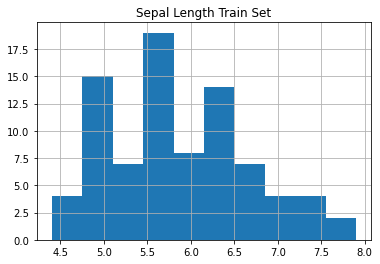

In [23]:
plt.title('Sepal Length Train Set')
train.sepal_length.hist()
plt.show()

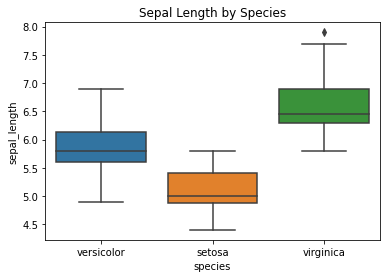

In [24]:
plt.title('Sepal Length by Species')
sns.boxplot(x='species', y='sepal_length', data = train)
plt.show()

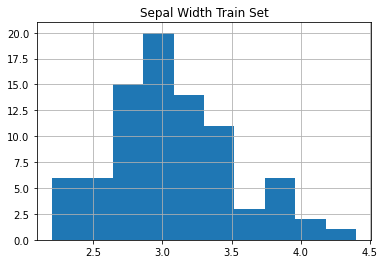

In [25]:
plt.title('Sepal Width Train Set')
train.sepal_width.hist()
plt.show()

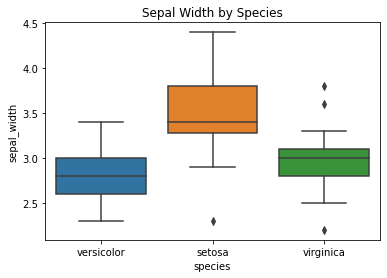

In [26]:
plt.title('Sepal Width by Species')
sns.boxplot(x='species', y='sepal_width', data=train)
plt.show()

In [14]:
train.sepal_width.describe()

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64

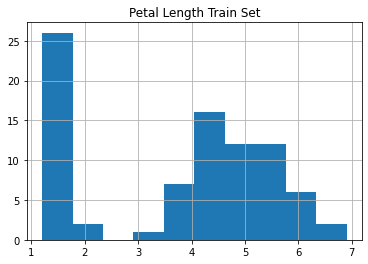

In [27]:
plt.title('Petal Length Train Set')
train.petal_length.hist()
plt.show()

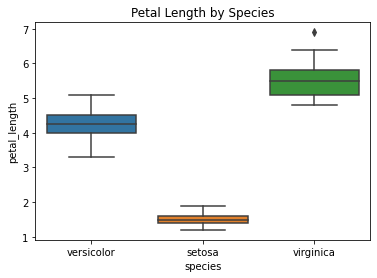

In [28]:
plt.title('Petal Length by Species')
sns.boxplot(x='species', y='petal_length', data = train)
plt.show()

In [15]:
train.petal_length.describe()

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

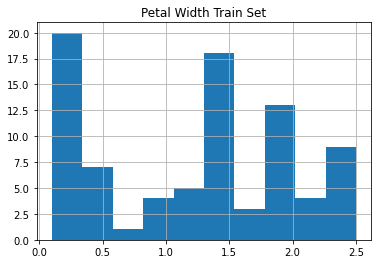

In [29]:
plt.title('Petal Width Train Set')
train.petal_width.hist()
plt.show()

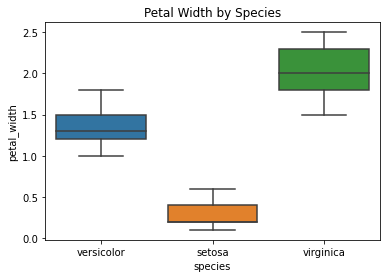

In [30]:
plt.title('Petal Width by Species')
sns.boxplot(x='species', y='petal_width', data=train)
plt.show()

In [16]:
train.petal_width.describe()

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

In [43]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies
# sns.barplot(x='', y='', data=train)
train.species.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

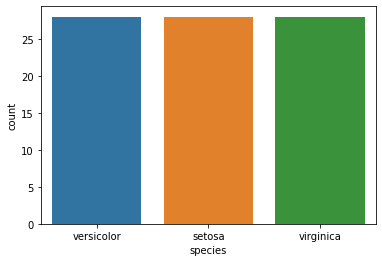

In [44]:
sns.countplot(train.species)

In [45]:
# Takeaways/Actions
# Can see very observable differences in the measurements between species. Appears to be a stronger correlation
# with petal attributes than sepal for determining species.

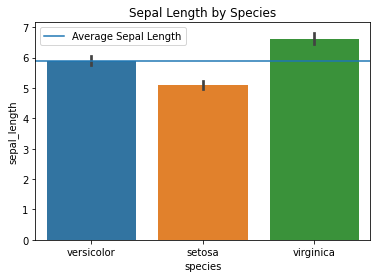

In [46]:
# 3. Bivariate Stats
# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal
# line showing the overall mean of the metric (y-axis)
plt.title('Sepal Length by Species')
sns.barplot(x='species', y='sepal_length', data=train)
sepal_length_avg = train.sepal_length.mean()
plt.axhline(sepal_length_avg, label='Average Sepal Length')
plt.legend()
plt.show()

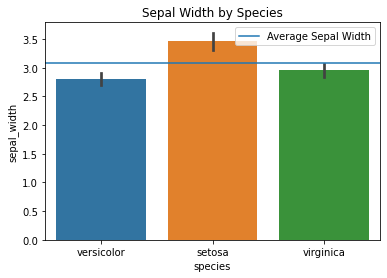

In [47]:
plt.title('Sepal Width by Species')
sns.barplot(x='species', y='sepal_width', data=train)
sepal_width_avg = train.sepal_width.mean()
plt.axhline(sepal_width_avg, label='Average Sepal Width')
plt.legend()
plt.show()

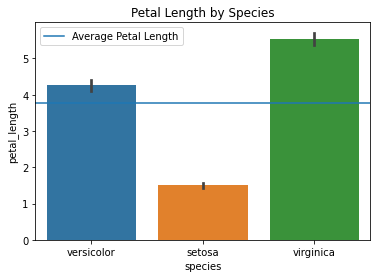

In [48]:
plt.title('Petal Length by Species')
sns.barplot(x='species', y='petal_length', data=train)
petal_length_avg = train.petal_length.mean()
plt.axhline(petal_length_avg, label='Average Petal Length')
plt.legend()
plt.show()

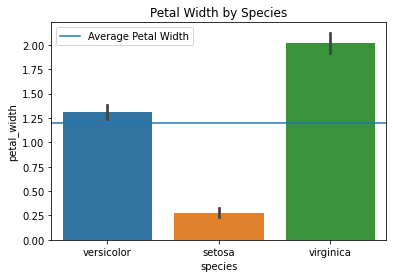

In [49]:
plt.title('Petal Width by Species')
sns.barplot(x='species', y='petal_width', data=train)
petal_width_avg = train.petal_width.mean()
plt.axhline(petal_width_avg, label='Average Petal Width')
plt.legend()
plt.show()

In [ ]:
# Measurement type, compute the descriptive stats for each species
